<a href="https://colab.research.google.com/github/jangirsachin9619-cpu/ML.assignment1/blob/main/MLa1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
path = ('/content/drive/MyDrive/Food_Delivery_Time_Prediction.csv') # Example: replace with your actual path
data=pd.read_csv(path)
data.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Order_ID                    200 non-null    object 
 1   Customer_Location           200 non-null    object 
 2   Restaurant_Location         200 non-null    object 
 3   Distance                    200 non-null    float64
 4   Weather_Conditions          200 non-null    object 
 5   Traffic_Conditions          200 non-null    object 
 6   Delivery_Person_Experience  200 non-null    int64  
 7   Order_Priority              200 non-null    object 
 8   Order_Time                  200 non-null    object 
 9   Vehicle_Type                200 non-null    object 
 10  Restaurant_Rating           200 non-null    float64
 11  Customer_Rating             200 non-null    float64
 12  Delivery_Time               200 non-null    float64
 13  Order_Cost                  200 non

In [16]:
data.isnull().sum()

,0
Order_ID,0
Customer_Location,0
Restaurant_Location,0
Distance,0
Weather_Conditions,0
Traffic_Conditions,0
Delivery_Person_Experience,0
Order_Priority,0
Order_Time,0
Vehicle_Type,0


In [17]:
data_encoded = pd.get_dummies(data, columns=['Weather_Conditions', 'Traffic_Conditions', 'Vehicle_Type'], drop_first=True)
print(data_encoded.head())

  Order_ID       Customer_Location     Restaurant_Location  Distance  \
0  ORD0001  (17.030479, 79.743077)  (12.358515, 85.100083)      1.57   
1  ORD0002  (15.398319, 86.639122)  (14.174874, 77.025606)     21.32   
2  ORD0003  (15.687342, 83.888808)  (19.594748, 82.048482)      6.95   
3  ORD0004  (20.415599, 78.046984)  (16.915906, 78.278698)     13.79   
4  ORD0005  (14.786904, 78.706532)  (15.206038, 86.203182)      6.72   

   Delivery_Person_Experience Order_Priority Order_Time  Restaurant_Rating  \
0                           4         Medium  Afternoon                4.1   
1                           8            Low      Night                4.5   
2                           9           High      Night                3.3   
3                           2         Medium    Evening                3.2   
4                           6            Low      Night                3.5   

   Customer_Rating  Delivery_Time  Order_Cost  Tip_Amount  \
0              3.0          26.22    

In [18]:
from sklearn.preprocessing import StandardScaler
columns_to_standardize = ['Distance', 'Delivery_Time', 'Order_Cost']
scaler = StandardScaler()
data_encoded[columns_to_standardize] = scaler.fit_transform(data_encoded[columns_to_standardize])
print(data_encoded.head())

  Order_ID       Customer_Location     Restaurant_Location  Distance  \
0  ORD0001  (17.030479, 79.743077)  (12.358515, 85.100083) -1.454738   
1  ORD0002  (15.398319, 86.639122)  (14.174874, 77.025606)  1.439192   
2  ORD0003  (15.687342, 83.888808)  (19.594748, 82.048482) -0.666417   
3  ORD0004  (20.415599, 78.046984)  (16.915906, 78.278698)  0.335835   
4  ORD0005  (14.786904, 78.706532)  (15.206038, 86.203182) -0.700119   

   Delivery_Person_Experience Order_Priority Order_Time  Restaurant_Rating  \
0                           4         Medium  Afternoon                4.1   
1                           8            Low      Night                4.5   
2                           9           High      Night                3.3   
3                           2         Medium    Evening                3.2   
4                           6            Low      Night                3.5   

   Customer_Rating  Delivery_Time  Order_Cost  Tip_Amount  \
0              3.0      -1.487932    

In [19]:
data_encoded = pd.get_dummies(data_encoded, columns=['Order_Priority', 'Order_Time'], drop_first=True)
print(data_encoded.head())

  Order_ID       Customer_Location     Restaurant_Location  Distance  \
0  ORD0001  (17.030479, 79.743077)  (12.358515, 85.100083) -1.454738   
1  ORD0002  (15.398319, 86.639122)  (14.174874, 77.025606)  1.439192   
2  ORD0003  (15.687342, 83.888808)  (19.594748, 82.048482) -0.666417   
3  ORD0004  (20.415599, 78.046984)  (16.915906, 78.278698)  0.335835   
4  ORD0005  (14.786904, 78.706532)  (15.206038, 86.203182) -0.700119   

   Delivery_Person_Experience  Restaurant_Rating  Customer_Rating  \
0                           4                4.1              3.0   
1                           8                4.5              4.2   
2                           9                3.3              3.4   
3                           2                3.2              3.7   
4                           6                3.5              2.8   

   Delivery_Time  Order_Cost  Tip_Amount  ...  Weather_Conditions_Sunny  \
0      -1.487932    0.501852       81.54  ...                     False   
1 

In [20]:
coll_EDA=['Order_Time','Delivery_Time','Distance','Tip_Amount','Order_Cost','Customer_Rating','Restaurant_Rating','Delivery_Person_Experience']
numeric_coll_EDA = [col for col in coll_EDA if data[col].dtype in ['int64', 'float64']]
print("Mean:")
print(data[numeric_coll_EDA].mean())
print("\nMedian:")
print(data[numeric_coll_EDA].median())
print("\nMode:")
print(data[coll_EDA].mode())
print("\nStandard Deviation:")
print(data[numeric_coll_EDA].std())
print("\nVariance:")
print(data[numeric_coll_EDA].var())
print("\nSkewness:")
print(data[numeric_coll_EDA].skew())
print("\nKurtosis:")
print(data[numeric_coll_EDA].kurt())

Mean:
Delivery_Time                   70.49495
Distance                        11.49805
Tip_Amount                      46.61665
Order_Cost                    1046.48870
Customer_Rating                  3.68650
Restaurant_Rating                3.73850
Delivery_Person_Experience       5.25000
dtype: float64

Median:
Delivery_Time                   72.775
Distance                        10.265
Tip_Amount                      47.530
Order_Cost                    1035.950
Customer_Rating                  3.700
Restaurant_Rating                3.800
Delivery_Person_Experience       5.000
dtype: float64

Mode:
  Order_Time  Delivery_Time  Distance  Tip_Amount  Order_Cost  \
0  Afternoon          66.84      1.32        2.22     1813.25   
1        NaN            NaN      3.25       24.16         NaN   
2        NaN            NaN      4.33         NaN         NaN   
3        NaN            NaN      6.09         NaN         NaN   
4        NaN            NaN      7.38         NaN         NaN  

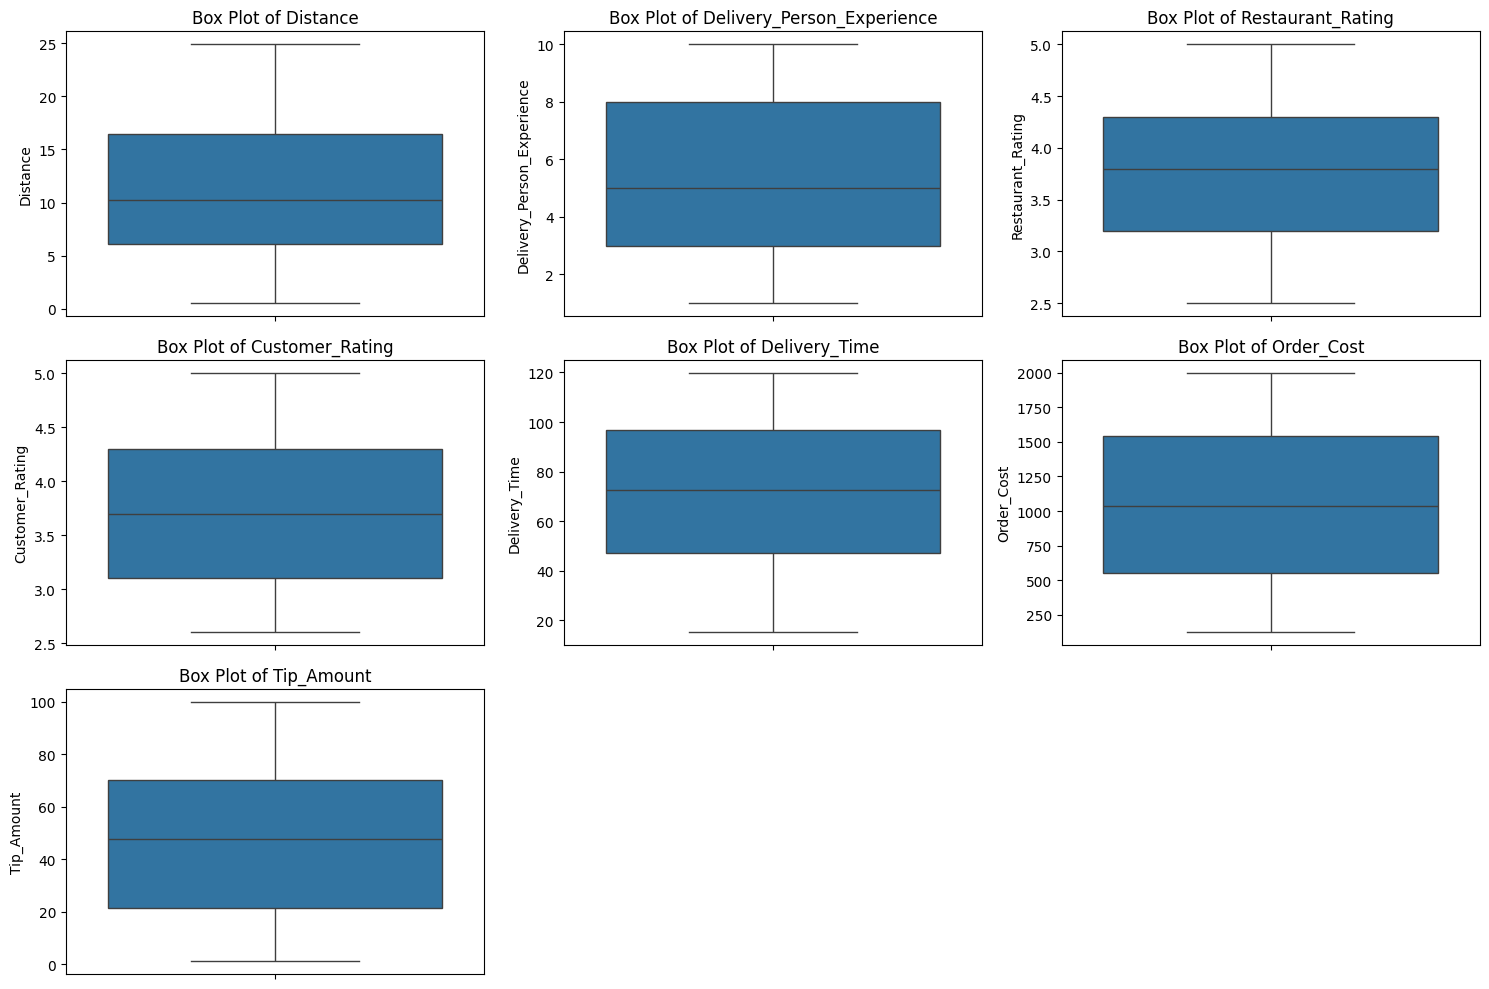

In [21]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=data[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()


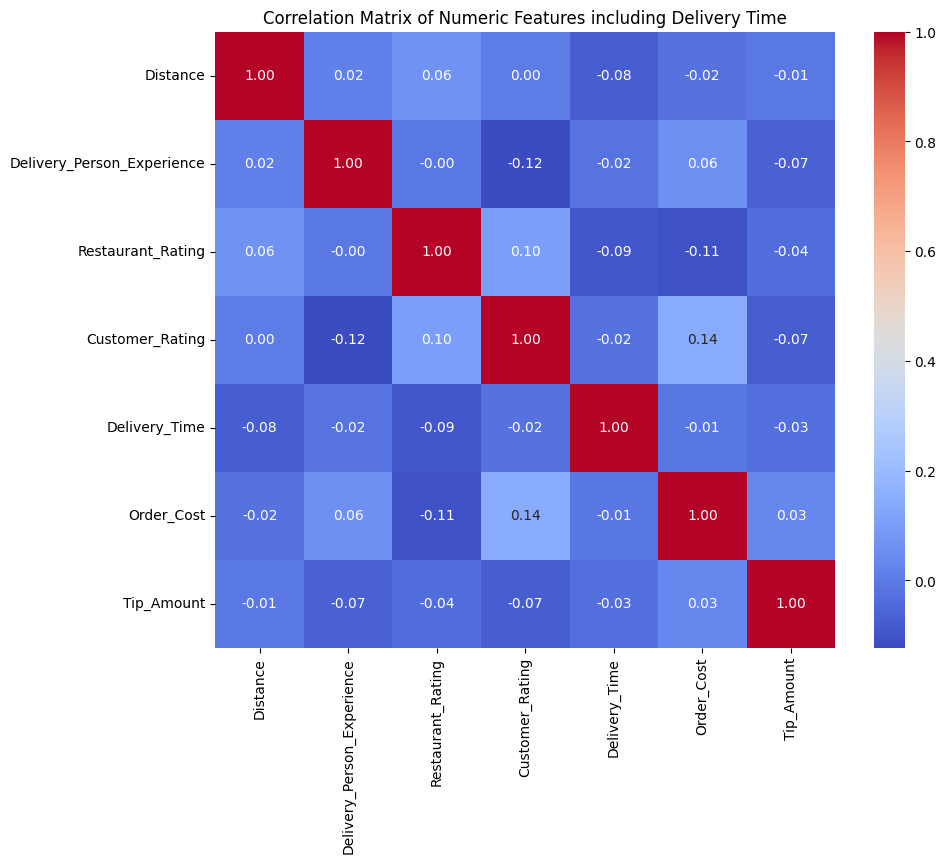

In [23]:
numeric_coll = data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(data[numeric_coll].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features including Delivery Time')
plt.show()

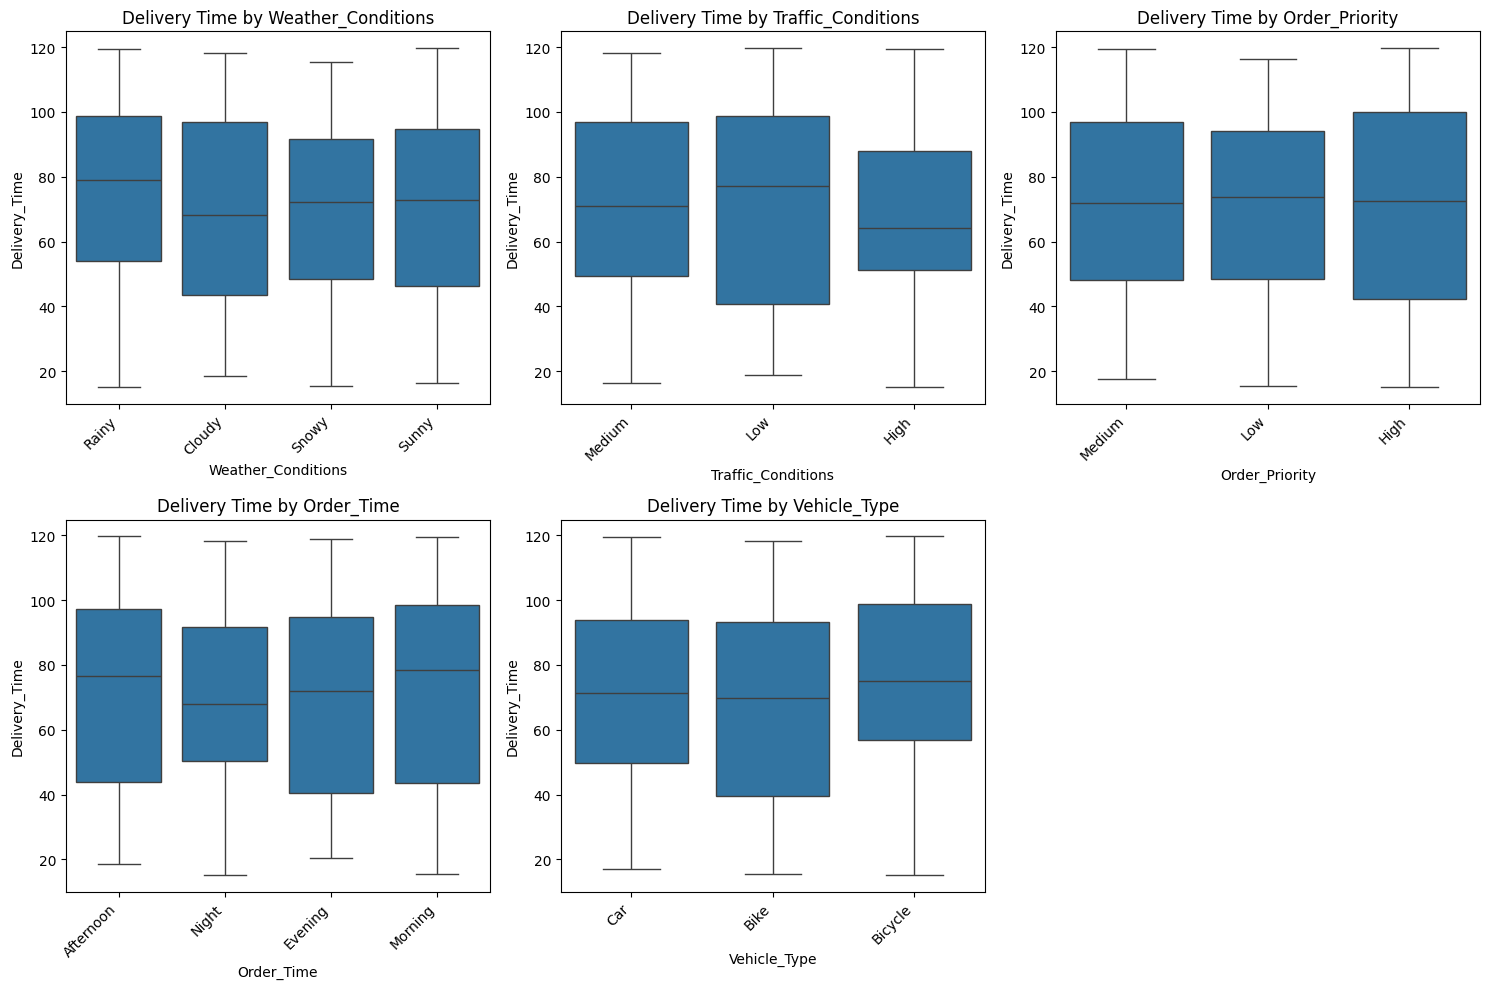

In [24]:

categorical_cols = data.select_dtypes(include='object').columns.tolist()

# Exclude 'Order_ID', 'Customer_Location', 'Restaurant_Location' as they are unique identifiers or already processed
categorical_cols_filtered = [col for col in categorical_cols if col not in ['Order_ID', 'Customer_Location', 'Restaurant_Location']]

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols_filtered):
    plt.subplot(2, 3, i + 1) # Adjust subplot grid based on number of categorical features
    sns.boxplot(x=col, y='Delivery_Time', data=data)
    plt.title(f'Delivery Time by {col}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [26]:
import re
def extract_lat_lon(location_str):
    match = re.match(r'\(([-+]?\d+\.\d+), ([-+]?\d+\.\d+)\)', location_str)
    if match:
        return float(match.group(1)), float(match.group(2))
    return None, None
data[['Customer_Latitude', 'Customer_Longitude']] = data['Customer_Location'].apply(lambda x: pd.Series(extract_lat_lon(x)))
data[['Restaurant_Latitude', 'Restaurant_Longitude']] = data['Restaurant_Location'].apply(lambda x: pd.Series(extract_lat_lon(x)))
print(data[['Customer_Latitude', 'Customer_Longitude', 'Restaurant_Latitude', 'Restaurant_Longitude']].head())

   Customer_Latitude  Customer_Longitude  Restaurant_Latitude  \
0          17.030479           79.743077            12.358515   
1          15.398319           86.639122            14.174874   
2          15.687342           83.888808            19.594748   
3          20.415599           78.046984            16.915906   
4          14.786904           78.706532            15.206038   

   Restaurant_Longitude  
0             85.100083  
1             77.025606  
2             82.048482  
3             78.278698  
4             86.203182  


In [27]:
import numpy as np

def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371

    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad

    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c
    return distance

data['Calculated_Distance'] = data.apply(lambda row: haversine_distance(row['Customer_Latitude'], row['Customer_Longitude'], row['Restaurant_Latitude'], row['Restaurant_Longitude']), axis=1)

print(data[['Distance', 'Calculated_Distance']].head())

   Distance  Calculated_Distance
0      1.57           775.651198
1     21.32          1042.385597
2      6.95           476.220706
3     13.79           389.912629
4      6.72           806.505886


In [29]:
order_time_mapping = {
    'Morning': 9,
    'Afternoon': 14,
    'Evening': 19,
    'Night': 22
}

data['Order_Hour'] = data['Order_Time'].map(order_time_mapping)
print(data[['Order_Time', 'Order_Hour']].head())

  Order_Time  Order_Hour
0  Afternoon          14
1      Night          22
2      Night          22
3    Evening          19
4      Night          22


In [30]:
data['Is_Rush_Hour'] = ((data['Order_Hour'] >= 7) & (data['Order_Hour'] <= 9)) | \
                         ((data['Order_Hour'] >= 16) & (data['Order_Hour'] <= 19))
print(data[['Order_Time', 'Order_Hour', 'Is_Rush_Hour']].head())

  Order_Time  Order_Hour  Is_Rush_Hour
0  Afternoon          14         False
1      Night          22         False
2      Night          22         False
3    Evening          19          True
4      Night          22         False


In [42]:
data_encoded = data_encoded.merge(data[['Order_ID', 'Customer_Latitude', 'Customer_Longitude', 'Restaurant_Latitude', 'Restaurant_Longitude', 'Calculated_Distance', 'Order_Hour', 'Is_Rush_Hour']], on='Order_ID', how='left', suffixes=('_encoded', '_original'))
columns_to_drop = ['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Delivery_Time']
X = data_encoded.drop(columns=[col for col in columns_to_drop if col in data_encoded.columns])
y = data_encoded['Delivery_Time']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets successfully.")

Data split into training and testing sets successfully.


In [41]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
score = lr.score(x_test, y_test)
print(score)

-0.03488864462166541


In [44]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.034888644621663856

In [45]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Squared Error (MSE): 1.0810
R-squared (R²): -0.0349
Mean Absolute Error (MAE): 0.8914


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score,recall_score,f1_score
import pandas as pd

In [49]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [50]:
median_delivery_time = data['Delivery_Time'].median()
data_encoded['Delivery_Status'] = (data_encoded['Delivery_Time'] > median_delivery_time).astype(int)
print(data_encoded[['Delivery_Time', 'Delivery_Status']].head())

   Delivery_Time  Delivery_Status
0      -1.487932                0
1      -0.264987                0
2      -0.741529                0
3       1.382411                0
4      -1.280915                0


In [51]:
median_delivery_time_standardized = data_encoded['Delivery_Time'].median()
data_encoded['Delivery_Status'] = (data_encoded['Delivery_Time'] > median_delivery_time_standardized).astype(int)
print(data_encoded[['Delivery_Time', 'Delivery_Status']].head())

   Delivery_Time  Delivery_Status
0      -1.487932                0
1      -0.264987                0
2      -0.741529                0
3       1.382411                1
4      -1.280915                0


In [52]:
columns_to_drop_classification = ['Delivery_Time', 'Order_ID', 'Customer_Location', 'Restaurant_Location', 'Delivery_Status', 'Order_Cost_original']
X_classification = data_encoded.drop(columns=[col for col in columns_to_drop_classification if col in data_encoded.columns])
y_classification = data_encoded['Delivery_Status']

x_train_classification, x_test_classification, y_train_classification, y_test_classification = train_test_split(X_classification, y_classification, test_size=0.25, random_state=0)

print("Data split into training and testing sets for classification successfully.")
print(f"Shape of x_train_classification: {x_train_classification.shape}")
print(f"Shape of y_train_classification: {y_train_classification.shape}")
print(f"Shape of x_test_classification: {x_test_classification.shape}")
print(f"Shape of y_test_classification: {y_test_classification.shape}")

Data split into training and testing sets for classification successfully.
Shape of x_train_classification: (150, 32)
Shape of y_train_classification: (150,)
Shape of x_test_classification: (50, 32)
Shape of y_test_classification: (50,)


In [53]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=0, max_iter=1000)
log_reg.fit(x_train_classification, y_train_classification)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=0, max_iter=5000)
log_reg.fit(x_train_classification, y_train_classification)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
columns_to_drop_classification = ['Delivery_Time', 'Order_ID', 'Customer_Location', 'Restaurant_Location', 'Delivery_Status', 'Order_Cost_original']
X_classification = data_encoded.drop(columns=[col for col in columns_to_drop_classification if col in data_encoded.columns])
y_classification = data_encoded['Delivery_Status']

x_train_classification, x_test_classification, y_train_classification, y_test_classification = train_test_split(X_classification, y_classification, test_size=0.25, random_state=0)
numerical_cols_to_scale = [
    'Delivery_Person_Experience', 'Restaurant_Rating', 'Customer_Rating', 'Tip_Amount',
    'Customer_Latitude', 'Customer_Longitude', 'Restaurant_Latitude', 'Restaurant_Longitude',
    'Calculated_Distance', 'Order_Hour'
]

scaler_classification = StandardScaler()
x_train_classification[numerical_cols_to_scale] = scaler_classification.fit_transform(x_train_classification[numerical_cols_to_scale])
x_test_classification[numerical_cols_to_scale] = scaler_classification.transform(x_test_classification[numerical_cols_to_scale])

print("Data split into training and testing sets for classification successfully.")
print(f"Shape of x_train_classification: {x_train_classification.shape}")
print(f"Shape of y_train_classification: {y_train_classification.shape}")
print(f"Shape of x_test_classification: {x_test_classification.shape}")
print(f"Shape of y_test_classification: {y_test_classification.shape}")

Data split into training and testing sets for classification successfully.
Shape of x_train_classification: (150, 39)
Shape of y_train_classification: (150,)
Shape of x_test_classification: (50, 39)
Shape of y_test_classification: (50,)


In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
data_encoded = data_encoded.merge(data[['Order_ID', 'Customer_Latitude', 'Customer_Longitude', 'Restaurant_Latitude', 'Restaurant_Longitude', 'Calculated_Distance', 'Order_Hour', 'Is_Rush_Hour']], on='Order_ID', how='left', suffixes=('_encoded', '_original'))

columns_to_drop_classification = ['Delivery_Time', 'Order_ID', 'Customer_Location', 'Restaurant_Location', 'Delivery_Status']
X_classification = data_encoded.drop(columns=[col for col in columns_to_drop_classification if col in data_encoded.columns])
y_classification = data_encoded['Delivery_Status']

x_train_classification, x_test_classification, y_train_classification, y_test_classification = train_test_split(X_classification, y_classification, test_size=0.25, random_state=0)
numerical_cols_to_scale = [
    'Delivery_Person_Experience', 'Restaurant_Rating', 'Customer_Rating', 'Tip_Amount',
    'Customer_Latitude', 'Customer_Longitude', 'Restaurant_Latitude', 'Restaurant_Longitude',
    'Calculated_Distance', 'Order_Hour'
]
scaler_classification = StandardScaler()
x_train_classification[numerical_cols_to_scale] = scaler_classification.fit_transform(x_train_classification[numerical_cols_to_scale])
x_test_classification[numerical_cols_to_scale] = scaler_classification.transform(x_test_classification[numerical_cols_to_scale])

print("Data split into training and testing sets for classification successfully.")
print(f"Shape of x_train_classification: {x_train_classification.shape}")
print(f"Shape of y_train_classification: {y_train_classification.shape}")
print(f"Shape of x_test_classification: {x_test_classification.shape}")
print(f"Shape of y_test_classification: {y_test_classification.shape}")

Data split into training and testing sets for classification successfully.
Shape of x_train_classification: (150, 39)
Shape of y_train_classification: (150,)
Shape of x_test_classification: (50, 39)
Shape of y_test_classification: (50,)


In [58]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=0, max_iter=5000)
log_reg.fit(x_train_classification, y_train_classification)

print("Logistic Regression model trained successfully on scaled data.")

Logistic Regression model trained successfully on scaled data.


In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred_classification = log_reg.predict(x_test_classification)

accuracy = accuracy_score(y_test_classification, y_pred_classification)
precision = precision_score(y_test_classification, y_pred_classification)
recall = recall_score(y_test_classification, y_pred_classification)
f1 = f1_score(y_test_classification, y_pred_classification)

print(f"Classification Model Evaluation (Logistic Regression):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_classification, y_pred_classification))

Classification Model Evaluation (Logistic Regression):
Accuracy: 0.4600
Precision: 0.4800
Recall: 0.4615
F1-Score: 0.4706

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.46      0.45        24
           1       0.48      0.46      0.47        26

    accuracy                           0.46        50
   macro avg       0.46      0.46      0.46        50
weighted avg       0.46      0.46      0.46        50



In [62]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test_classification, y_pred_classification)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[11 13]
 [14 12]]
